## Answer Ranking Function

In [42]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from IPython.display import display

In [43]:
df = pd.read_csv('data/cleaned.csv')

In [44]:
df.head()

,Id,Tag,Score_question,Title,Body_question,Score_answer,Body_answer
0,469,"['python', 'osx', 'fonts', 'photoshop']",21,find full path font display name mac,using photoshop javascript api find font given...,4,open terminal terminal type locate insertfonth...
1,469,"['python', 'osx', 'fonts', 'photoshop']",21,find full path font display name mac,using photoshop javascript api find font given...,2,not able find anything directly think iterate ...
2,469,"['python', 'osx', 'fonts', 'photoshop']",21,find full path font display name mac,using photoshop javascript api find font given...,12,unfortunately api not deprecated located appli...
3,469,"['python', 'osx', 'fonts', 'photoshop']",21,find full path font display name mac,using photoshop javascript api find font given...,1,must method cocoa get list font would use pyob...
4,502,"['python', 'windows', 'image', 'pdf']",27,get preview jpeg pdf window,python application need generate jpeg preview ...,9,use imagemagick convert utility see example ht...


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987122 entries, 0 to 987121
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Id              987122 non-null  int64 
 1   Tag             987122 non-null  object
 2   Score_question  987122 non-null  int64 
 3   Title           986547 non-null  object
 4   Body_question   987101 non-null  object
 5   Score_answer    987122 non-null  int64 
 6   Body_answer     986275 non-null  object
dtypes: int64(3), object(4)
memory usage: 52.7+ MB


In [46]:
df.describe()

,Id,Score_question,Score_answer
count,9.871220e+05,987122.000000,987122.000000
mean,2.053496e+07,7.275413,3.028437
std,1.195486e+07,63.667863,21.263246
min,4.690000e+02,-44.000000,-38.000000
25%,9.968532e+06,0.000000,0.000000
50%,2.103550e+07,1.000000,1.000000
75%,3.115233e+07,3.000000,3.000000
max,4.014319e+07,5524.000000,8384.000000


In [47]:
df_SortedByQuestionScore = df.sort_values(by="Score_question", ascending=False)

In [48]:
df_SortedByQuestionScore.head()

,Id,Tag,Score_question,Title,Body_question,Score_answer,Body_answer
5863,231767,"['python', 'iterator', 'generator', 'yield', '...",5524,yield keyword,use yield keyword python example trying unders...,24,like every answer suggests yield used creating...
5872,231767,"['python', 'iterator', 'generator', 'yield', '...",5524,yield keyword,use yield keyword python example trying unders...,1,summary yield statement transforms function fa...
5870,231767,"['python', 'iterator', 'generator', 'yield', '...",5524,yield keyword,use yield keyword python example trying unders...,8,yet another tl dr iterator list next return ne...
5869,231767,"['python', 'iterator', 'generator', 'yield', '...",5524,yield keyword,use yield keyword python example trying unders...,27,tl dr find building list scratch def n x range...
5868,231767,"['python', 'iterator', 'generator', 'yield', '...",5524,yield keyword,use yield keyword python example trying unders...,14,answer speaks perspective using python generat...


In [49]:
df_SortedByAnswerScore = df.sort_values(by="Score_answer", ascending=False)

In [50]:
df_SortedByAnswerScore.head()

,Id,Tag,Score_question,Title,Body_question,Score_answer,Body_answer
5845,231767,"['python', 'iterator', 'generator', 'yield', '...",5524,yield keyword,use yield keyword python example trying unders...,8384,understand yield must understand generator gen...
2233,100003,"['python', 'oop', 'metaclass', 'python-datamod...",3219,metaclass python,metaclasses use,4510,class object understanding metaclasses need ma...
20287,739654,"['python', 'decorator', 'python-decorators']",1920,make chain function decorator python,make two decorator python would following make...,3332,not long explanation see paolo answer decorato...
10416,394809,"['python', 'operators', 'ternary-operator', 'c...",2655,python ternary conditional operator,python not ternary conditional operator possib...,3110,yes added version syntax condition else b firs...
14187,522563,"['python', 'loops', 'list']",1512,accessing index python loop,access index list like following ints loop usi...,2666,using additional state variable index variable...


In [51]:
best_questions_overall = (df.drop_duplicates(subset="Id").sort_values(by="Score_question", ascending=False))

In [52]:
best_questions_overall.head()

,Id,Tag,Score_question,Title,Body_question,Score_answer,Body_answer
5842,231767,"['python', 'iterator', 'generator', 'yield', '...",5524,yield keyword,use yield keyword python example trying unders...,141,yield like return return whatever tell differe...
2228,100003,"['python', 'oop', 'metaclass', 'python-datamod...",3219,metaclass python,metaclasses use,217,metaclasses secret sauce make work default met...
1899,82831,"['python', 'file', 'filesystems']",2729,check whether file exists using python,check whether file exists without using try st...,211,import filename
10416,394809,"['python', 'operators', 'ternary-operator', 'c...",2655,python ternary conditional operator,python not ternary conditional operator possib...,3110,yes added version syntax condition else b firs...
2035,89228,"['python', 'shell', 'command', 'subprocess', '...",2312,calling external command python,call external command would typed unix shell w...,27,import o command note dangerous since command ...


In [53]:
best_answers_overall = (df.drop_duplicates(subset="Id").sort_values(by="Score_answer", ascending=False))

In [54]:
best_answers_overall.head()

,Id,Tag,Score_question,Title,Body_question,Score_answer,Body_answer
10416,394809,"['python', 'operators', 'ternary-operator', 'c...",2655,python ternary conditional operator,python not ternary conditional operator possib...,3110,yes added version syntax condition else b firs...
1162,53513,"['python', 'list']",1615,best way check list empty,example passed following check see empty,2388,not print list empty using implicit booleannes...
20283,739654,"['python', 'decorator', 'python-decorators']",1920,make chain function decorator python,make two decorator python would following make...,2338,check documentation see decorator work asked d...
13769,509211,"['python', 'list', 'slice']",1331,explain python slice notation,need good explanation reference plus python sl...,1891,pretty simple really start end item start star...
4445,176918,"['python', 'list']",1222,finding index item given list containing python,list foo bar baz item list bar cleanest way ge...,1857,foo bar baz bar reference data structure list


In [55]:
Raw_Question_Scores_Sorted = df[["Id","Score_question", "Score_answer"]].sort_values(by="Score_question", ascending=True)

In [56]:
Raw_Answer_Scores_Sorted = df[["Id","Score_question", "Score_answer"]].sort_values(by="Score_answer", ascending=True)

In [57]:
Raw_Question_Scores_Sorted

,Id,Score_question,Score_answer
608231,25970488,-44,4
608232,25970488,-44,-26
608234,25970488,-44,-1
608233,25970488,-44,4
720346,30402552,-32,10
...,...,...,...
5842,231767,5524,141
5843,231767,5524,78
5844,231767,5524,236
5861,231767,5524,24


In [58]:
Raw_Question_Scores_Sorted.head(20)

,Id,Score_question,Score_answer
608231,25970488,-44,4
608232,25970488,-44,-26
608234,25970488,-44,-1
608233,25970488,-44,4
720346,30402552,-32,10
943609,38567618,-19,3
625523,26724585,-18,2
768071,32191198,-18,1
797706,33287341,-17,-1
867675,35779178,-17,1


In [59]:
Raw_Answer_Scores_Sorted

,Id,Score_question,Score_answer
120465,4320679,105,-38
608232,25970488,-44,-26
77625,2725852,42,-24
12740,473620,185,-23
105956,3780737,11,-23
...,...,...,...
14187,522563,1512,2666
10416,394809,2655,3110
20287,739654,1920,3332
2233,100003,3219,4510


In [60]:
Raw_Answer_Scores_Sorted.head(20)

,Id,Score_question,Score_answer
120465,4320679,105,-38
608232,25970488,-44,-26
77625,2725852,42,-24
12740,473620,185,-23
105956,3780737,11,-23
22170,805066,271,-19
445,28796,52,-18
75802,2654149,17,-17
18941,688245,17,-17
39035,1408940,16,-16


In [61]:
Raw_Question_Scores_Sorted.head(20)

,Id,Score_question,Score_answer
608231,25970488,-44,4
720346,30402552,-32,10
943609,38567618,-19,3
625523,26724585,-18,2
768071,32191198,-18,1
797706,33287341,-17,-1
867675,35779178,-17,1
931027,38106947,-16,0
923712,37833625,-14,1


In [62]:
Raw_Answer_Scores_Sorted.head(20)

,Id,Score_question,Score_answer
120465,4320679,105,-38
608232,25970488,-44,-26
77625,2725852,42,-24
12740,473620,185,-23
105956,3780737,11,-23
22170,805066,271,-19
445,28796,52,-18
75802,2654149,17,-17
18941,688245,17,-17
39035,1408940,16,-16


Text(0.5, 1.0, 'Question vs Answer Scores')

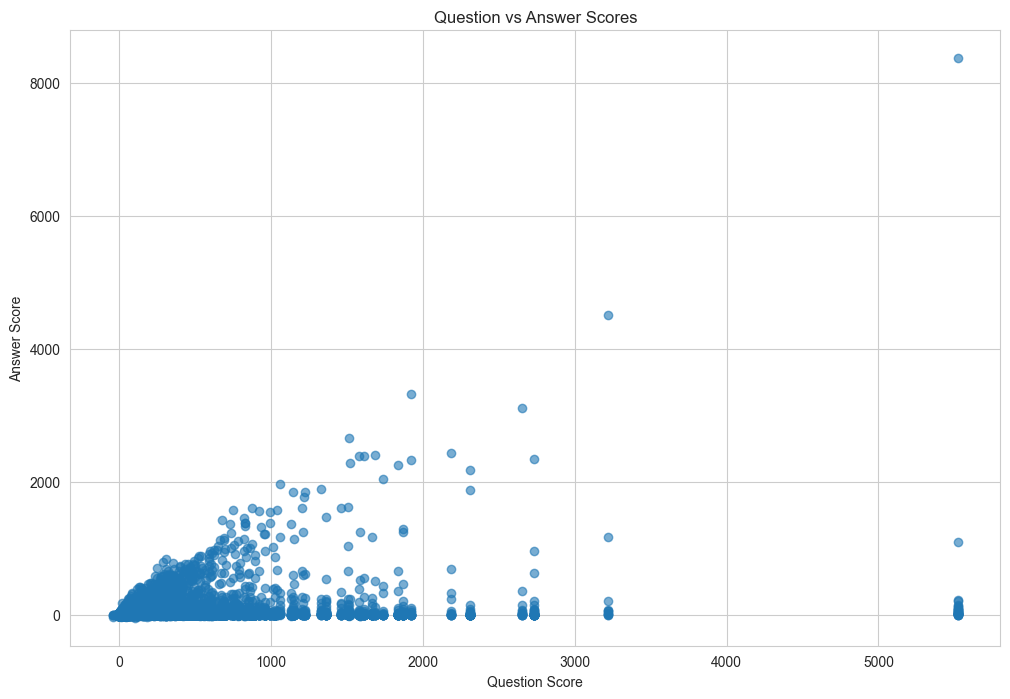

In [63]:
plt.figure(figsize=(12,8))
plt.scatter(Raw_Answer_Scores_Sorted["Score_question"], Raw_Answer_Scores_Sorted["Score_answer"], alpha=0.6)
plt.xlabel("Question Score")
plt.ylabel("Answer Score")
plt.title("Question vs Answer Scores")

The above code sorts the Data and taking a closer look at the unique values/upvotes provided by the dataset. I've named these pretty intuitively so as to avoid any confusion as to what they refer to. My purpose behind doing this was to better understand which examples we would utilize/emphasize as good examples, and which would we de-emphasize as bad ones. I also ended up graphing this data to see if any interesting relationships would pop up. Another bonus of graphing the data is we can see any clear clusters. In this particular graph (above), the independent variable is shown to be the Question Score, and the dependent the Answer Score, as my core assumption was that the answer's scores would be dependent on the how good quality the question was. The next steps (assuming we do continue with this dataset, and in my opinion we should as it seems to be the most authoritative) would be to cluster the data (with linear/radial sections) and go from there determining which regions should again be weighted more versus less in our model.

In [64]:
df["Score_ratio"] = abs(df["Score_question"]).div(df["Score_answer"].replace(0, np.nan))

In [65]:
Raw_Scores_Ratios_Sorted = df[["Id","Body_question","Body_answer","Score_question","Score_answer","Score_ratio"]].sort_values(by="Score_ratio", ascending=False)

In [66]:
Raw_Scores_Ratios_Sorted.head(50)

,Id,Body_question,Body_answer,Score_question,Score_answer,Score_ratio
5872,231767,use yield keyword python example trying unders...,summary yield statement transforms function fa...,5524,1,5524.0
1929,82831,check whether file exists without using try st...,demo try open fp pas except ioerror e print un...,2729,1,2729.0
1931,82831,check whether file exists without using try st...,import o iffile filename return success iffile...,2729,1,2729.0
2062,89228,call external command would typed unix shell w...,use subprocess import call using list call ech...,2312,1,2312.0
2073,89228,call external command would typed unix shell w...,import subprocess p df print give nice output ...,2312,1,2312.0
2071,89228,call external command would typed unix shell w...,would recommend following method help u gettin...,2312,1,2312.0
2068,89228,call external command would typed unix shell w...,using popen function subprocess python module ...,2312,1,2312.0
20290,739654,make two decorator python would following make...,speaking counter example given counter shared ...,1920,1,1920.0
20294,739654,make two decorator python would following make...,def makehtmltag tag args kwds def fn kwds kwds...,1920,1,1920.0
760,38987,two python dictionary want write single expres...,solution not specified man love python z x not...,1867,1,1867.0


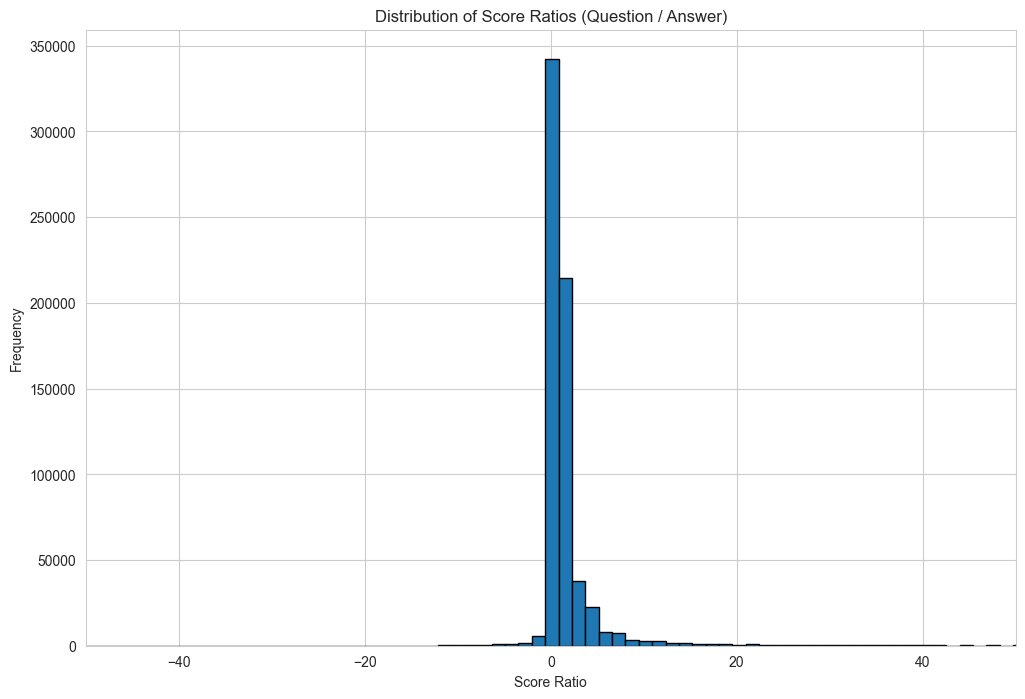

In [67]:
plt.figure(figsize=(12,8))
plt.hist(df["Score_ratio"], bins=5000, edgecolor='black')
plt.xlim(-50,50)
plt.title("Question vs Answer Scores")
plt.title("Distribution of Score Ratios (Question / Answer)")
plt.xlabel("Score Ratio")
plt.ylabel("Frequency")
plt.show()

In [68]:
def bin_count(a: int, b: int):
    bin_counts = (df["Score_ratio"] >= a) & (df["Score_ratio"] < b)
    count = bin_counts.sum()
    return count

In [69]:
print(bin_count(-1,1))

350516


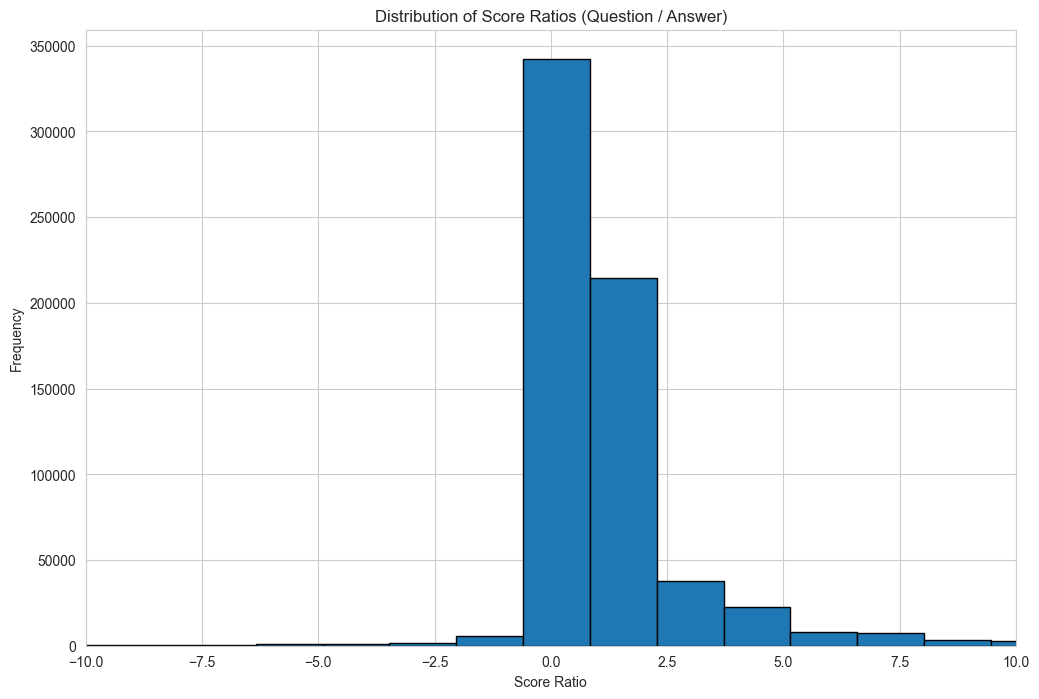

In [70]:
plt.figure(figsize=(12,8))
plt.hist(df["Score_ratio"], bins=5000, edgecolor='black')
plt.xlim(-10,10)
plt.title("Question vs Answer Scores")
plt.title("Distribution of Score Ratios (Question / Answer)")
plt.xlabel("Score Ratio")
plt.ylabel("Frequency")
plt.show()

In [71]:
df_good_subset = df[(df["Score_ratio"] >= 0) & (df["Score_ratio"] <= 1)]

In [72]:
df_sorted_good_subset = df_good_subset.sort_values(by="Score_question", ascending=True)

In [73]:
df_sorted_good_subset.head(50)

,Id,Tag,Score_question,Title,Body_question,Score_answer,Body_answer,Score_ratio
947256,38697037,"['python', 'python-3.x', 'python-unicode']",-10,convert python unicode function correct python...,enabled compatibility check python ide realize...,10,already pointed comment already advice porting...,1.000000
300042,12344414,"['c++', 'python', 'performance', 'code-generat...",-10,use code converter python,let say right bat not programmer guy idea taki...,12,generally awful way write code not guarantee f...,0.833333
721809,30457198,"['python', 'math', 'floor']",-9,floor function not symmetric positive negative...,using python function giving different answer ...,11,per documentation return floor x float largest...,0.818182
179191,6832332,"['python', 'syntax']",-7,python syntax error,try run code def table nb nb print nb nb else ...,10,suspect trying print nb nb note comma final ar...,0.700000
400313,17011074,['python'],-7,check something python,wrote could please see wrong code beginner pyt...,7,want test equality string exit not convert int...,1.000000
339303,14166358,"['python', 'string', 'comparison', 'element']",-7,string comparison,need fast function comparison two string examp...,12,zero effort shown heck weekend itertools impor...,0.583333
784009,32799607,['python'],-7,create loop,currently use range print print digit want add...,9,rather create range loop string get individual...,0.777778
723824,30537791,"['python', 'list', 'tuples']",-7,python defining list list,trying define table color contains various tab...,8,list not take pair probably want dictionary in...,0.875000
666985,28391831,['python'],-6,xxpython comment multiple line not working array,example array want comment work array not arra...,6,using multi line string syntax not commenting ...,1.000000
432707,18433341,"['python', 'django']",-6,custom django login not compare password,new django python read doc standard login syst...,7,not django perfectly good fully documented sys...,0.857143


In [74]:
df_sorted_good_subset.describe()

,Id,Score_question,Score_answer,Score_ratio
count,4.650500e+05,465050.000000,465050.000000,465050.000000
mean,2.107375e+07,2.313448,4.626823,0.436521
std,1.143106e+07,19.553445,28.217718,0.406437
min,5.940000e+02,-10.000000,-7.000000,-0.000000
25%,1.138445e+07,0.000000,1.000000,0.000000
50%,2.151633e+07,1.000000,2.000000,0.400000
75%,3.099757e+07,2.000000,4.000000,1.000000
max,4.014319e+07,5524.000000,8384.000000,1.000000


The score ratio represents the ratio of the ratio of the question score to the answer score. Ranking answers by their score ratio is the next step, based on the assumption that if a given question has a certain number of upvotes, then good answers to the given question will also have a similar number of upvotes. Based on this assumption, the "best answers" to a given question should have a score ratio between 0 and 1, with questions having higher score ratios than that being worse responses. This is reflected in the graphs above.

# Implementing Heuristic Function

Here we create an interval search function, taking the score_ratio (between question score and answer score) and ranking questions based on a certain upper bound and lower bound for the score ratio, and lowest overall question score.

In [75]:
def Interval_Search(lower_bound, upper_bound, lowest_question_score):
    return df[(df["Score_ratio"] >= lower_bound) & (df["Score_ratio"] <= upper_bound) & (df["Score_question"] > lowest_question_score)].sort_values(by="Score_answer", ascending=False)

In [76]:
Interval_Search(0,1,50)

,Id,Tag,Score_question,Title,Body_question,Score_answer,Body_answer,Score_ratio
5845,231767,"['python', 'iterator', 'generator', 'yield', '...",5524,yield keyword,use yield keyword python example trying unders...,8384,understand yield must understand generator gen...,0.658874
2233,100003,"['python', 'oop', 'metaclass', 'python-datamod...",3219,metaclass python,metaclasses use,4510,class object understanding metaclasses need ma...,0.713747
20287,739654,"['python', 'decorator', 'python-decorators']",1920,make chain function decorator python,make two decorator python would following make...,3332,not long explanation see paolo answer decorato...,0.576230
10416,394809,"['python', 'operators', 'ternary-operator', 'c...",2655,python ternary conditional operator,python not ternary conditional operator possib...,3110,yes added version syntax condition else b firs...,0.853698
14187,522563,"['python', 'loops', 'list']",1512,accessing index python loop,access index list like following ints loop usi...,2666,using additional state variable index variable...,0.567142
...,...,...,...,...,...,...,...,...
379662,16082954,"['python', 'list', 'sorting']",52,python sort list dictionary several value,want sort list first value second value easy w...,52,operator import itemgetter sorted,1.000000
77757,2731022,"['python', 'comments', 'interpreter', 'interpr...",51,comment slow interpreted language,asking use python could apply interpreted lang...,52,case python source file compiled executed file...,0.980769
394016,16729574,"['python', 'table', 'dataframe', 'pandas']",51,get value cell data frame,constructed condition extract exactly one row ...,52,dataframe one row access first row series usin...,0.980769
112579,4019971,['python'],52,implement self container object python,written custom container object according page...,52,normally would use generator function time use...,1.000000


In [80]:
Interval_Search(0,3,50)

,Id,Tag,Score_question,Title,Body_question,Score_answer,Body_answer,Score_ratio
5845,231767,"['python', 'iterator', 'generator', 'yield', '...",5524,yield keyword,use yield keyword python example trying unders...,8384,understand yield must understand generator gen...,0.658874
2233,100003,"['python', 'oop', 'metaclass', 'python-datamod...",3219,metaclass python,metaclasses use,4510,class object understanding metaclasses need ma...,0.713747
20287,739654,"['python', 'decorator', 'python-decorators']",1920,make chain function decorator python,make two decorator python would following make...,3332,not long explanation see paolo answer decorato...,0.576230
10416,394809,"['python', 'operators', 'ternary-operator', 'c...",2655,python ternary conditional operator,python not ternary conditional operator possib...,3110,yes added version syntax condition else b firs...,0.853698
14187,522563,"['python', 'loops', 'list']",1512,accessing index python loop,access index list like following ints loop usi...,2666,using additional state variable index variable...,0.567142
...,...,...,...,...,...,...,...,...
437146,18641438,"['python', 'python-3.x', 'cygwin', 'pip']",52,installing cygwin,python installed cygwin however unable install...,18,think alternative install instruction linked m...,2.888889
52041,1859072,"['python', 'loops']",52,python continuing next iteration outer loop,wanted know way continue next iteration outer ...,18,language label loop break labelled loop python...,2.888889
298227,12253200,"['python', 'functional-programming', 'lisp', '...",51,lisp loop different python,encounter following statement richard stallman...,17,system one typically develops program running ...,3.000000
938282,38369470,"['python', 'lambda']",51,lambda list comprehension returning lambda called,trying iterate lambda func list want get call ...,17,closure python meaning lambda function list ev...,3.000000


In [96]:
def plotting_searched_df(lower_bound, upper_bound, lowest_question_score):
    Searched_df = Interval_Search(lower_bound,upper_bound,lowest_question_score)
    plt.figure(figsize=(12,8))
    plt.scatter(Searched_df["Score_question"], Searched_df["Score_answer"], alpha=0.6)
    plt.xlabel("Question Score")
    plt.ylabel("Answer Score")
    plt.title("Question vs Answer Scores in Searched Data Frame")

    plt.figure(figsize=(12,8))
    plt.scatter(Searched_df["Score_ratio"], Searched_df["Score_question"], alpha=0.6)
    plt.xlabel("Ratio")
    plt.ylabel("Question Score")
    plt.title("Question vs Answer Scores in Searched Data Frame")

    return Searched_df

,Id,Tag,Score_question,Title,Body_question,Score_answer,Body_answer,Score_ratio
5845,231767,"['python', 'iterator', 'generator', 'yield', '...",5524,yield keyword,use yield keyword python example trying unders...,8384,understand yield must understand generator gen...,0.658874
2233,100003,"['python', 'oop', 'metaclass', 'python-datamod...",3219,metaclass python,metaclasses use,4510,class object understanding metaclasses need ma...,0.713747
20287,739654,"['python', 'decorator', 'python-decorators']",1920,make chain function decorator python,make two decorator python would following make...,3332,not long explanation see paolo answer decorato...,0.576230
10416,394809,"['python', 'operators', 'ternary-operator', 'c...",2655,python ternary conditional operator,python not ternary conditional operator possib...,3110,yes added version syntax condition else b firs...,0.853698
14187,522563,"['python', 'loops', 'list']",1512,accessing index python loop,access index list like following ints loop usi...,2666,using additional state variable index variable...,0.567142
...,...,...,...,...,...,...,...,...
379662,16082954,"['python', 'list', 'sorting']",52,python sort list dictionary several value,want sort list first value second value easy w...,52,operator import itemgetter sorted,1.000000
77757,2731022,"['python', 'comments', 'interpreter', 'interpr...",51,comment slow interpreted language,asking use python could apply interpreted lang...,52,case python source file compiled executed file...,0.980769
394016,16729574,"['python', 'table', 'dataframe', 'pandas']",51,get value cell data frame,constructed condition extract exactly one row ...,52,dataframe one row access first row series usin...,0.980769
112579,4019971,['python'],52,implement self container object python,written custom container object according page...,52,normally would use generator function time use...,1.000000


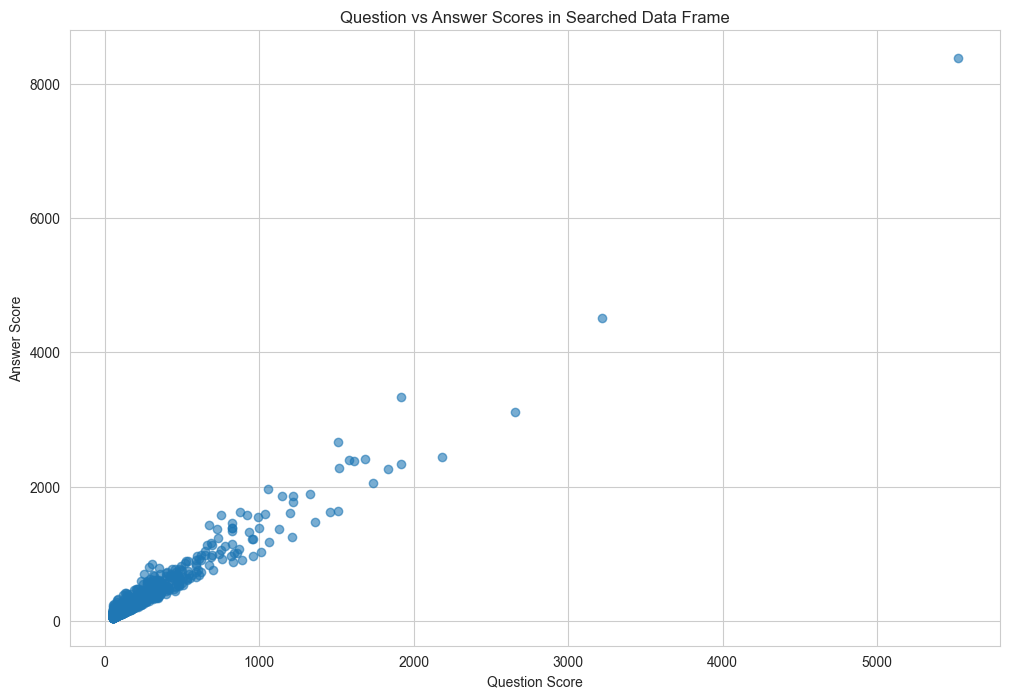

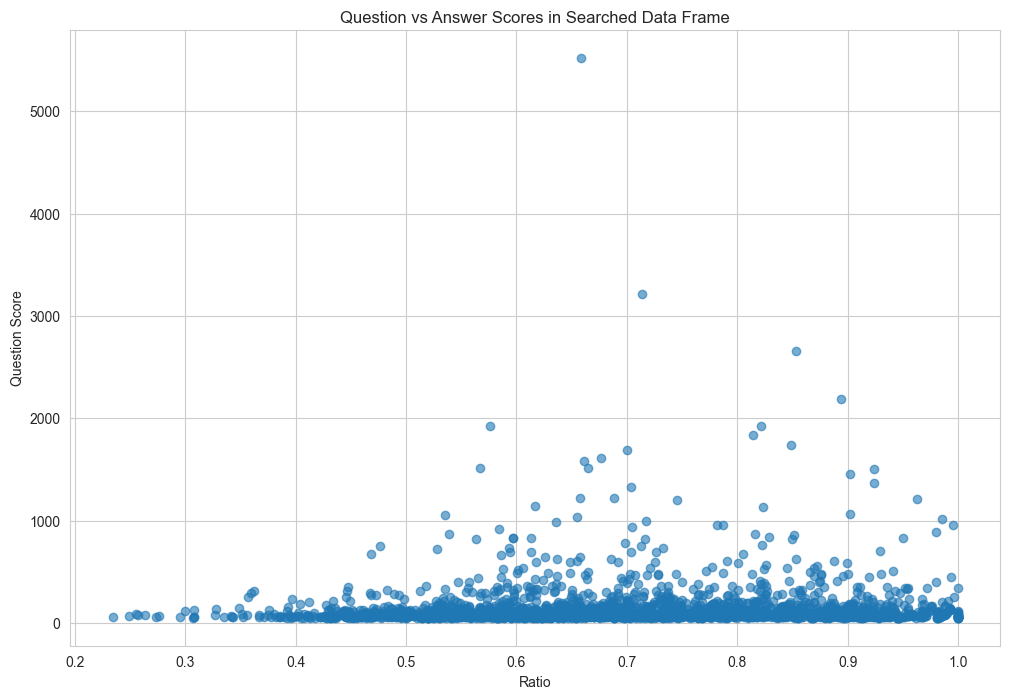

In [97]:
plotting_searched_df(0, 1, 50)

This is an implementation of the "radial/sector search" based on score ratios. The values we want to consider fall into a certain section. Since the upper bound is already decided by the data we have provided, all I've done here is filtered the data based on "goodness" (number of upvotes) relative to the number of upvotes the question had. Then I've graphed this (both in a question_score, answer_score format and in a ratio to question_score format) to better visualize the data. The second search function also returns the respective rows that are graphed. For a better look at what this does, see the original graph.